In [1]:
import pandas as pd

## The Dataset

The dataset used for this project comes from Insideairbnb.com, an anti-Airbnb lobby group that scrapes Airbnb listings, reviews and calendar data for multiple cities around the world. The dataset was scraped on 30 September 2021 and contains information on all Copenhagen Airbnb listings that were live on the site on that date. 

## Cleaning and PreProcessing

### Importing the libraries

In [3]:
import pandas as pd
import numpy as np

In [5]:
raw_df = pd.read_csv('/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data/Copenhagen/2021-09-30/data/listings.csv.gz')
print(f"The dataset contains {len(raw_df)} AirBnb listings.")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

The dataset contains 9625 AirBnb listings.


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6983,https://www.airbnb.com/rooms/6983,20210930020050,2021-09-30,Copenhagen 'N Livin',"Lovely apartment located in the hip Nørrebro area, close to bars, cafés and restaurants.<br />The room itself is rather small, but sleeps two. Has a bed, hangers and a cupboard.<br />Large living room with couch, chair and small table, as well as a large dining table for dinner.<br />Large bathroom with good shower and washing machine.<br />Kitchen with new gas stove, pots and pans, coffee machine and other amenities. Also a small table, where you can have breakfast.<br /><br /><b>The space</b><br />Beautiful and cosy apartment conveniently located in the hip Nørrebro area, close to cafés, bakeries, shops, and bars.<br />The apartment has three bedrooms and a living room, as well as a large bathroom and a fully equipped kitchen. You will be renting the small room, which sleeps 2 people.<br /><br />Situated in the outskirts of central Copenhagen, in the charming multi-cultural ""Nørrebro""-area, close to shopping amenities and a 10-min walk from both Copenhagen Business School (CBS) and U","Nice bars and cozy cafes just minutes away, yet the street itself is quiet and you won't be bothered by loud music.",https://a0.muscache.com/pictures/42044170/f63c4d99_original.jpg,16774,https://www.airbnb.com/users/show/16774,Simon,2009-05-12,"Copenhagen, Capital Region of Denmark, Denmark","I'm currently working as an environmental consultant for a large engineering consultancy in Copenhagen.\r\nWhen I'm not at work, I spend time doing sports (playing football, running, cross fit), or doing indoor activities such as reading books and listening to music. I have recently taken an interest in cooking, and I love great food. \r\nI'm outgoing, happy and love good company.\r\nAnd I love my bike as any other person from Copenhagen..",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/16774/profile_pic/1401276934/original.jpg?aki_policy=profile_small,https://a0.muscache.com/im/users/16774/profile_pic/1401276934/original.jpg?aki_policy=profile_x_medium,Nørrebro,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Copenhagen, Hovedstaden, Denmark",Nrrebro,NaN,55.68641,12.54741,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Cooking basics"", ""Washer"", ""Heating"", ""Backyard"", ""Wifi"", ""Bed linens"", ""Hot water"", ""Hangers"", ""Hair dryer"", ""Refrigerator"", ""Oven"", ""Coffee maker"", ""Dedicated workspace"", ""Room-darkening shades"", ""Stove"", ""Paid parking off premises"", ""Luggage dropoff allowed"", ""Microwave"", ""Smoke alarm"", ""Dishwasher"", ""Cable TV"", ""Kitchen"", ""Iron"", ""TV with standard cable"", ""Dishes and silverware"", ""Ess

## Dropping initial columns
+ Drop free texts columns
+ drop columns which not useful for predicting price

In [14]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']


df = raw_df.drop(cols_to_drop, axis=1)

Other columns can be dropped because they contain a majority of null entries

In [15]:
df.isna().sum()

id                                                 0
picture_url                                        0
host_since                                         3
host_response_time                              2956
host_response_rate                              2956
host_acceptance_rate                            2617
host_is_superhost                                  3
host_listings_count                                3
host_total_listings_count                          3
host_has_profile_pic                               3
host_identity_verified                             3
neighbourhood                                   4242
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                    9625
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                  

In [23]:
#df.drop(['host_response_time', 'host_response_rate',
        #'host_acceptance_rate','neighbourhood', 'neighbourhood_group_cleansed',
        #'bathrooms','calendar_updated','license'], axis=1, inplace=True)

# set id as index
#df.set_index('id', inplace=True)


In [24]:
df.drop(['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)


In [25]:
lat_long = df[['latitude', 'longitude']]

In [30]:
df.drop(['latitude', 'longitude'],axis=1, inplace=True)


In [31]:
sum((df.minimum_nights == df.minimum_minimum_nights) == False)

475

In [32]:

df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)


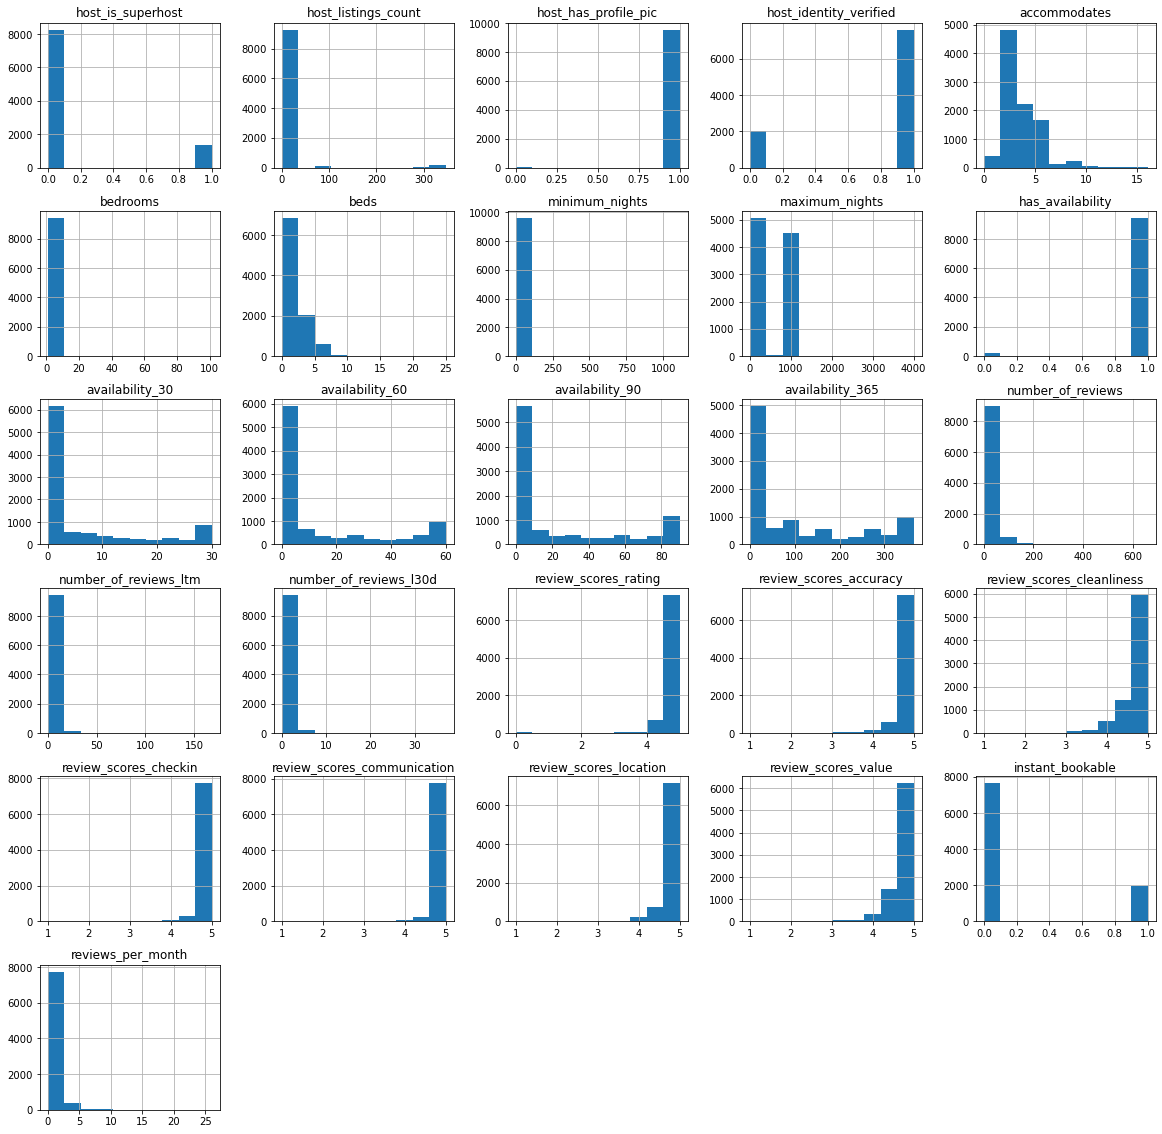

In [33]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

In [35]:

df.drop(['has_availability', 'host_has_profile_pic'], axis=1, inplace=True)


## Description of each column:

+ experiences_offered - slightly unclear as it does not appear to directly 
+ relate to Airbnb Experiences, but this seems to be the main recommended category of travel type, e.g. business
+ host_since - date that the host first joined Airbnb
+ host_response_time - average amount of time the host takes to reply to messages
+ host_response_rate - proportion of messages that the host replies to
+ host_is_superhost - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb
+ host_listings_count - how many listings the host has in total
+ host_identity_verified - whether or not the host has been verified with id
+ neighbourhood_cleansed - the London borough the property is in
+ property_type - type of property, e.g. house or flat
+ room_type - type of listing, e.g. entire home, private room or shared room
+ accommodates - how many people the property accommodates
+ bathrooms - number of bathrooms
+ bedrooms - number of bedrooms
+ beds - number of beds
+ bed_type - type of bed, e.g. real bed or sofa-bed
+ amenities - list of amenities
+ price - nightly advertised price (the target variable)
+ security_deposit - the amount required as a security deposit
+ cleaning_fee - the amount of the cleaning fee (a fixed amount paid per booking)
+ guests_included - the number of guests included in the booking fee
+ extra_people - the price per additional guest above the guests_included price
+ minimum_nights - the minimum length of stay
+ maximum_nights - the maximum length of stay
+ calendar_updated - when the host last updated the calendar
+ availability_30 - how many nights are available to be booked in the next 30 days
+ availability_60 - how many nights are available to be booked in the next 60 days
+ availability_90 - how many nights are available to be booked in the next 90 days
+ availability_365 - how many nights are available to be booked in the next 365 days
+ number_of_reviews - the number of reviews left for the property
+ number_of_reviews_ltm - the number of reviews left for the property in the last twelve months
+ first_review - the date of the first review
+ last_review - the date of the most recent review
+ review_scores_rating - guests can score properties overall from 1 to 5 stars
+ review_scores_accuracy - guests can score the accuracy of a property's description from 1 to 5 stars
+ review_scores_cleanliness - guests can score a property's cleanliness from 1 to 5 stars
+ review_scores_checkin - guests can score their check-in from 1 to 5 stars
+ review_scores_communication - guests can score a host's communication from 1 to 5 stars
+ review_scores_location - guests can score a property's location from 1 to 5 stars
+ review_scores_value - guests can score a booking's value for money from 1 to 5 stars
+ instant_bookable - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)
+ cancellation_policy - the type of cancellation policy, e.g. strict or moderate
+ reviews_per_month - calculated field of the average number of reviews left by guest each month